In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Загрузка данных
file_path = '/content/farfetch_parsing.csv'
data = pd.read_csv(file_path)

# 1 Первичный EDA анализ

In [2]:
# Отображение первых нескольких строк для обзора
data.head()

,brand.name,name,offers.price,offers.priceCurrency,offers.url,right side photo_image,full_name
0,Balenciaga,Track panelled sneakers,825,GBP,/uk/shopping/men/balenciaga-track-panelled-sne...,https://cdn-images.farfetch-contents.com/21/49...,Balenciaga Track panelled sneakers
1,Marni,Dada low-top leather sneakers,450,GBP,/uk/shopping/men/marni-dada-low-top-leather-sn...,https://cdn-images.farfetch-contents.com/20/46...,Marni Dada low-top leather sneakers
2,Giuseppe Zanotti,GZ94 branded-counter leather sneakers,625,GBP,/uk/shopping/men/giuseppe-zanotti-gz94-branded...,https://cdn-images.farfetch-contents.com/20/27...,Giuseppe Zanotti GZ94 branded-counter leather ...
3,Valentino Garavani,Open Skate lace-up sneakers,830,GBP,/uk/shopping/men/valentino-garavani-open-skate...,https://cdn-images.farfetch-contents.com/21/76...,Valentino Garavani Open Skate lace-up sneakers
4,Rick Owens DRKSHDW,x Converse high-top sneakers,212,GBP,/uk/shopping/men/rick-owens-drkshdw-x-converse...,https://cdn-images.farfetch-contents.com/21/76...,Rick Owens DRKSHDW x Converse high-top sneakers


In [3]:
# Общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18556 entries, 0 to 18555
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   brand.name              18556 non-null  object
 1   name                    18556 non-null  object
 2   offers.price            18556 non-null  int64 
 3   offers.priceCurrency    18556 non-null  object
 4   offers.url              18556 non-null  object
 5   right side photo_image  18556 non-null  object
 6   full_name               18556 non-null  object
dtypes: int64(1), object(6)
memory usage: 1014.9+ KB


In [4]:
# Основные статистики для числовых полей
data.describe()

,offers.price
count,18556.000000
mean,397.754850
std,871.124886
min,26.000000
25%,148.000000
50%,268.000000
75%,475.000000
max,50218.000000


In [5]:
# Проверка на пропущенные значения
data.isnull().sum()

brand.name                0
name                      0
offers.price              0
offers.priceCurrency      0
offers.url                0
right side photo_image    0
full_name                 0
dtype: int64

In [6]:
# Подсчет уникальных значений для каждой колонки
data.nunique()

brand.name                  299
name                      13785
offers.price               1189
offers.priceCurrency          1
offers.url                18556
right side photo_image    18556
full_name                 14777
dtype: int64

Можно дропнуть колонку offers.priceCurrency с всего одним значением (фунты)

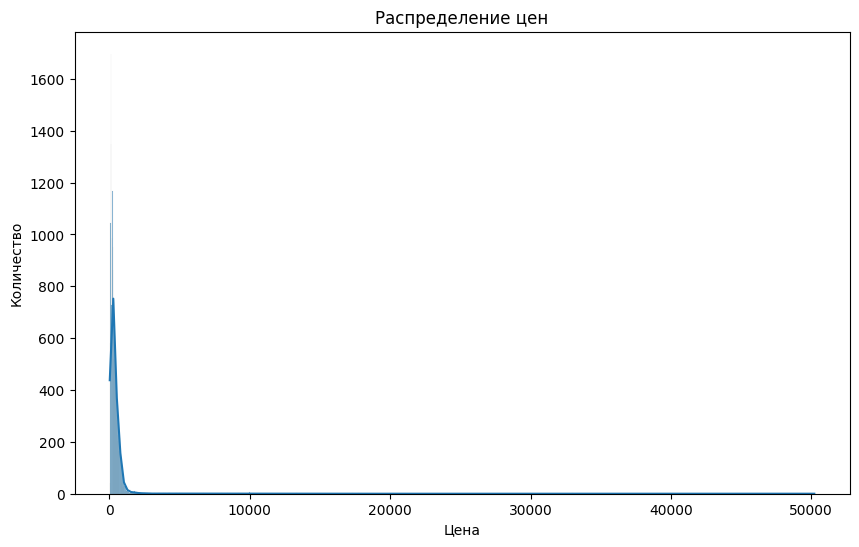

In [7]:
# Визуализация распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(data['offers.price'], kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

Есть куча аутлаеров делаем только до 99го квантиля

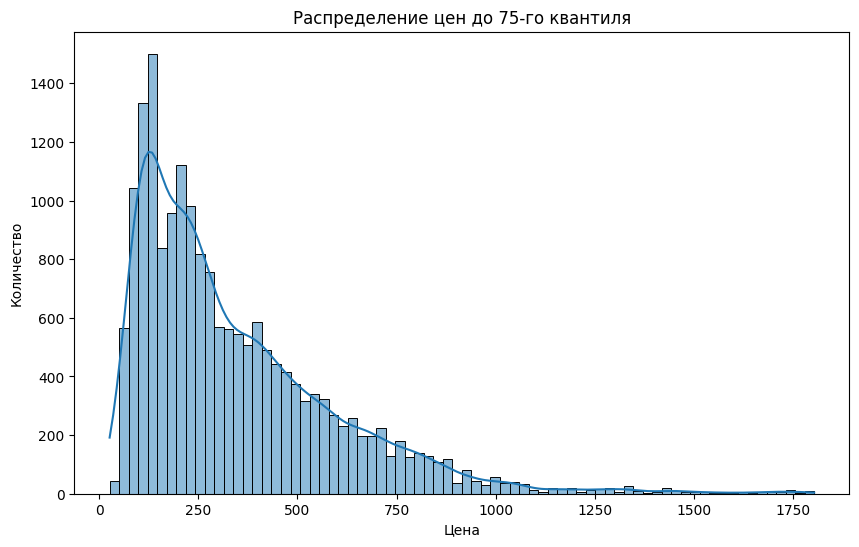

In [25]:
# Визуализация распределения цен до 99-го квантиля
quantile_99_offersprice = data['offers.price'].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(data[data['offers.price'] <= quantile_99_offersprice]['offers.price'], kde=True)
plt.title('Распределение цен до 75-го квантиля')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

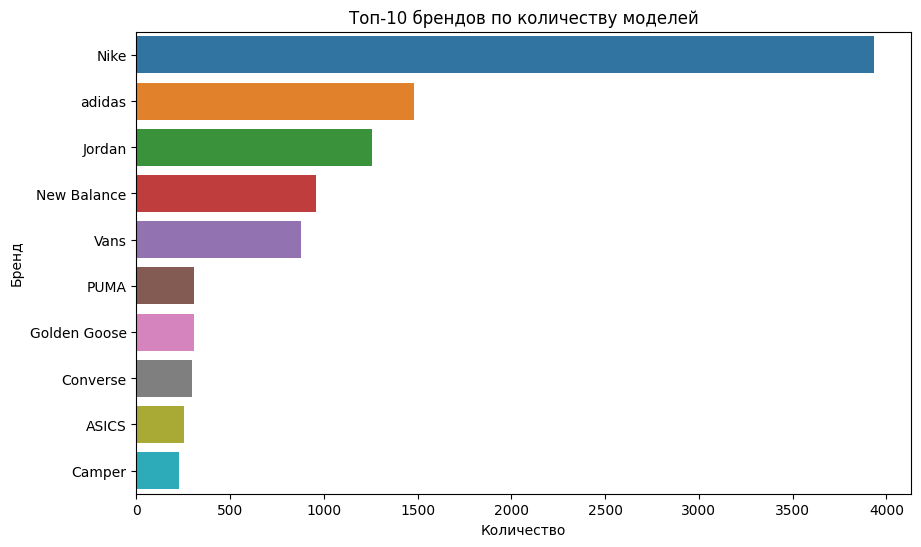

In [8]:
# Анализ распределения брендов
plt.figure(figsize=(10, 6))
sns.countplot(y='brand.name', data=data, order=data['brand.name'].value_counts().index[:10])
plt.title('Топ-10 брендов по количеству моделей')
plt.xlabel('Количество')
plt.ylabel('Бренд')
plt.show()

In [9]:
brand_price_stats = data.groupby('brand.name')['offers.price'].agg(['min', 'max', 'mean'])
brand_price_stats.sort_values(by='mean', ascending=False).head(10)  # прайс рейндж у топ 10 брендов

,min,max,mean
brand.name,,,
Guidi,1116,1920,1362.000000
VETEMENTS,660,1804,1341.500000
Nike X Off-White,137,10665,1177.536585
visvim,645,1525,1047.714286
Philipp Plein,442,5830,1005.712329
The Row,935,935,935.000000
Wales Bonner,923,923,923.000000
A Diciannoveventitre,877,877,877.000000
Boris Bidjan Saberi,594,1156,856.000000


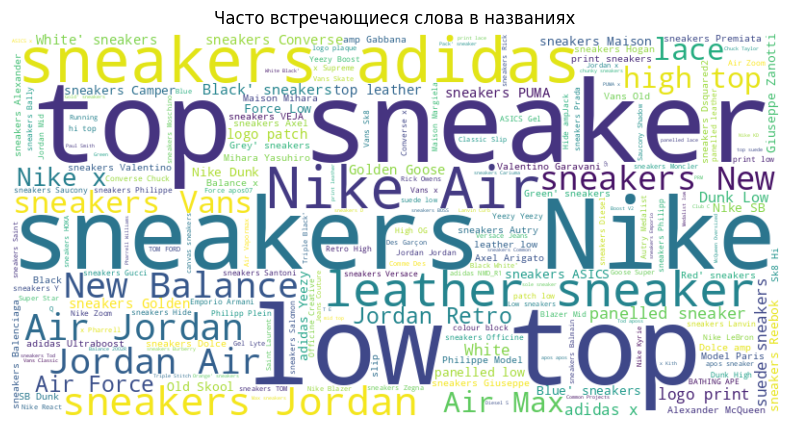

In [19]:
# Текстовый анализ названий
text = ' '.join(data['full_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Часто встречающиеся слова в названиях')
plt.show()

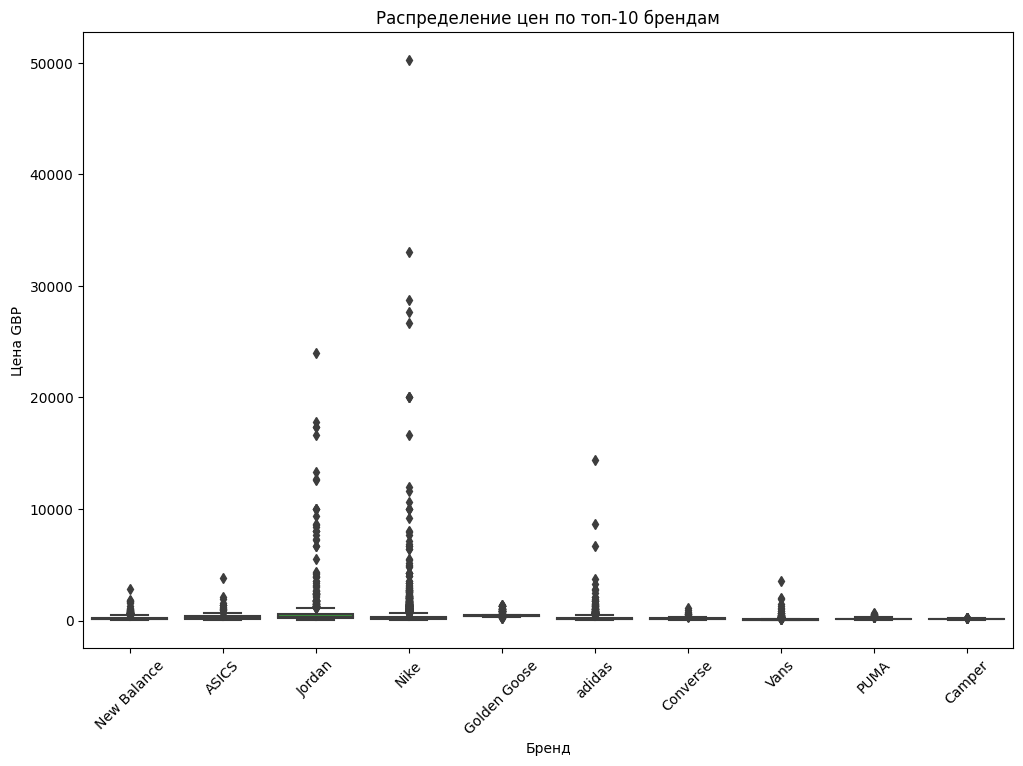

In [20]:
# Анализ распределения цен по брендам
top_brands = data['brand.name'].value_counts().index[:10]
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand.name', y='offers.price', data=data[data['brand.name'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title('Распределение цен по топ-10 брендам')
plt.xlabel('Бренд')
plt.ylabel('Цена GBP')
plt.show()

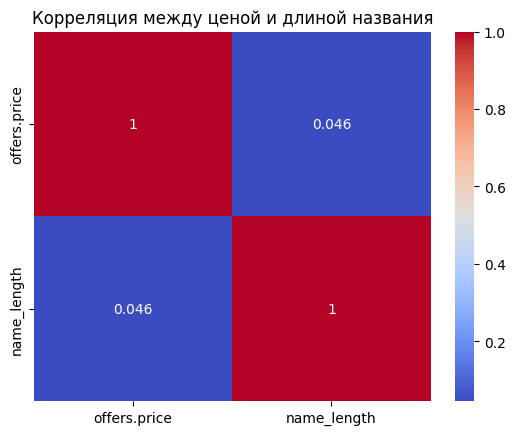

In [16]:
# Корреляционный анализ
# Связь между ценой и длиной названия хз ради рофла вставил )))
data['name_length'] = data['name'].apply(len)
corr = data[['offers.price', 'name_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между ценой и длиной названия')
plt.show()

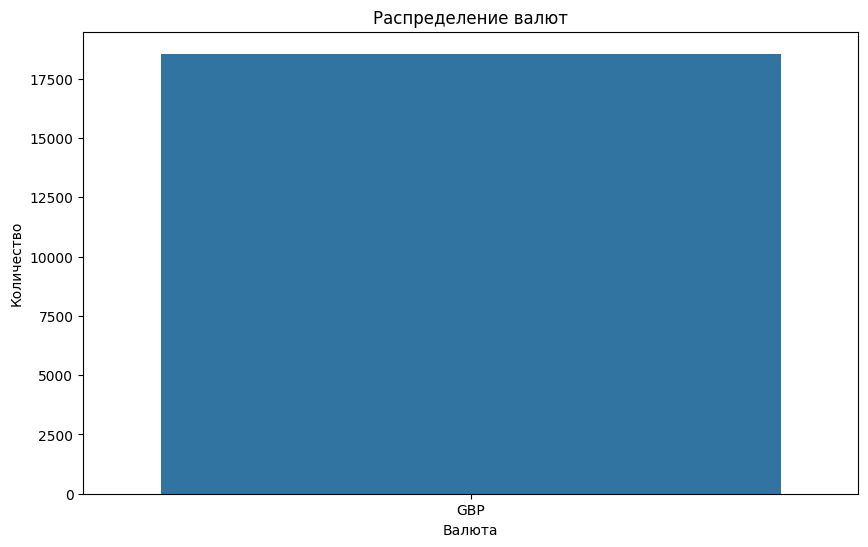

In [21]:
# Распределение валют
plt.figure(figsize=(10, 6))
sns.countplot(x='offers.priceCurrency', data=data)
plt.title('Распределение валют')
plt.xlabel('Валюта')
plt.ylabel('Количество')
plt.show()

## 1 Outcomes (key findings)

**Качество данных**:
- Все столбцы заполнены полностью, без пропущенных значений, что указывает на хорошее качество и полноту данных. Но есть некоторые нюансы в репрезентативности, о них ниже.

**Анализ бренда**:

- Набор данных включает в себя различные бренды кроссовок.
- Крупнейшими брендами по представленности являются Nike (3936 записей), Adidas (1482), Jordan (1256), New Balance (958) и Vans (881).
- Такое распределение предполагает большое разнообразие брендов, что полезно для обучения модели.

**Анализ цен**:

- Цены варьируются от 26 до 50 218, при этом единица измерения, вероятно, составляет фунты стерлингов, учитывая столбец валюты предложения.цена.
- Средняя цена кроссовок составляет примерно 397,75.
- Стандартное отклонение велико (871,12), что указывает на широкий диапазон цен, поэтому при анализе цен мы концентрируемся на части данных без выбросов.
- Средняя цена составляет 268 долларов, что ниже среднего показателя, намекая на перекос вправо в распределении.
- в основном все аутлаеры в ценах появляются от наличия у бренда колаборационных кроссовок или ультра-редких моделей

**Валюта**:
- Бесполезный признак, можно дропнуть

**Текстовый анализ названий кроссовок**:

- Распространенные слова: Наиболее частые слова включают "кроссовки", "низкие", "топ", "Nike", "Air", "Jordan" и "кожа". Эти штучки указывают на тип обуви, стиль и материалы (может быть полезно при попытказх мэтчить распознанное фото кроссовка с его "ключевыми" атрибутами).

- Названия брендов и моделей: Такие бренды, как "Nike", "Jordan", "Adidas", "New Balance" и "Vans", выделяются наряду с такими терминами, как "Air", который ассоциируется с серией Nike Air. Это отражает состав брендов наборов данных и конкретные модели внутри этих брендов, проще - датасет сильно скошен в сторону этих брендов.

- Коллаборации и специальные выпуски: Наличие буквы "x" указывает на сотрудничество или специальные выпуски кроссовок, что является обычной практикой в индустрии кроссовок, но может помешать распозновать бренд по фото тк будет сбивать модель как "редкий" кейс.
- Т.к. мы и так работаем только с кросовками - можно исключить слово Sneakers из названий

# 2 Обработка изображений и получение первичной инфы из них. Препроцессинг имэджей и Фичур экстракшн

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
from skimage.feature import local_binary_pattern

# Функция для скачивания изображения по URL
def download_image(url):
    response = requests.get(url)
    image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
    return image

# Функция для изменения размера изображения
def resize_image(image, size=(224, 224)):
    image_resized = cv2.resize(image, size)
    return image_resized

# Функция для нормализации изображения
def normalize_image(image):
    image_normalized = image / 255.0
    return image_normalized

# Функция для выделения контуров
def extract_edges(image):
    # Преобразование изображения в 8-битный формат
    image_8bit = (image * 255).astype('uint8')

    # Преобразование в оттенки серого
    gray = cv2.cvtColor(image_8bit, cv2.COLOR_BGR2GRAY)

    # Применение детектора границ Канни (https://habr.com/ru/articles/114589/) (подсмотрел на стаковерфлоу - выглядит полезно)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Функция для расчета гистограмм цветов
def color_histogram(image):
    # Преобразование изображения в 8-битный формат
    image_8bit = (image * 255).astype('uint8')

    # Расчет гистограммы для каждого цветового канала
    hist_b = cv2.calcHist([image_8bit], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_8bit], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image_8bit], [2], None, [256], [0, 256])
    return hist_b, hist_g, hist_r

# Функция для извлечения текстурных признаков
def texture_features(image):
    # Преобразование изображения в 8-битный формат
    image_8bit = (image * 255).astype('uint8')

    # Преобразование в оттенки серого
    gray = cv2.cvtColor(image_8bit, cv2.COLOR_BGR2GRAY)

    # Применение метода Локальных Бинарных Шаблонов (LBP)
    lbp = local_binary_pattern(gray, 24, 8, method="uniform")
    return lbp

    # # Отобразить график
    # plt.show()


for url in data['right side photo_image']:
    # Скачивание изображения
    image = download_image(url)

    # Предобработка изображения
    resized = resize_image(image)
    normalized = normalize_image(resized)

    # Извлечение признаков
    edges = extract_edges(normalized)
    hist_b, hist_g, hist_r = color_histogram(normalized)
    texture = texture_features(normalized)

# На этом этапе можно сохранить эти признаки или использовать их в качестве входных данных для ИИ модели

ТУТ В ДАТА СЕТ НИЧЕГО НЕ ПЕРЕЗАПИСЫВАЮ, ТОЛЬКО ТЕСТИРУЮ КАКОЙ БУДЕИТ РЕЗУЛЬТАТ РЕСАЙЗА И НОРМАЛИЗАЦИИ а также распознования границ и текстурных признаков

- не записываю потому что считает оно пиздецки долго (надо это на гпу выносить (потом могу сделать))

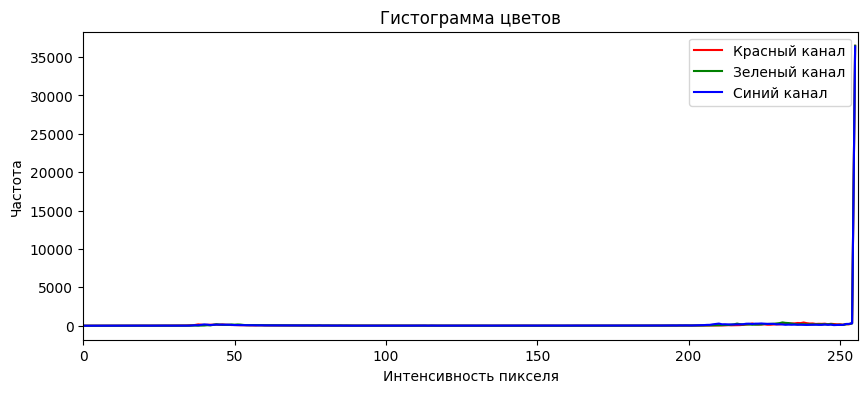

In [54]:
def plot_color_histogram(hist_b, hist_g, hist_r):
    # Создать фигуру и оси
    plt.figure(figsize=(10, 4))

    # Построить гистограммы для каждого цвета
    plt.plot(hist_r, color='red', label='Красный канал')
    plt.plot(hist_g, color='green', label='Зеленый канал')
    plt.plot(hist_b, color='blue', label='Синий канал')

    # Установить заголовок и метки для графика
    plt.title('Гистограмма цветов')
    plt.xlabel('Интенсивность пикселя')
    plt.ylabel('Частота')
    plt.xlim([0, 256])
    plt.legend()

plot_color_histogram(hist_b, hist_g, hist_r)

$$(!!)$$
- Куча белого на фото, надо удалить или как-то игнорить (фон)
$$(!!)$$

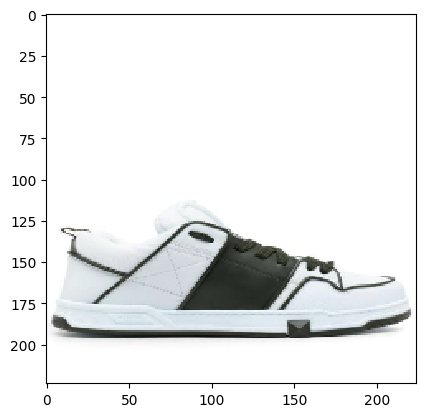

In [80]:
plt.imshow(normalized, interpolation='none') # interpolation='spline36'
plt.show()

Херится качество лого из-за уменьшения глубины картинки до 8-и бит при отсутствии сглаживания (интерполяции)((( (хотя это потенциально может быть и не так критично, а может даже оказаться полезным)

- Про интерполяцию: Используемый метод интерполяции.

Поддерживаемые значения: "нет", "сглажено", "ближайший", "билинейный", "бикубический", "сплайн16", "сплайн36", "ханнинг", "хэмминг", "эрмит", "кайзер", "квадрик", "катром", "гауссиан", 'бессель", "Митчелл", "синк", "ланцош", "блэкман".

Если значение *interpolation* равно "none", то интерполяция не выполняется в бэкэндах Agg, ps, pdf и svg. Другие бэкэнды вернутся к "ближайшему". Обратите внимание, что большинство средств рендеринга SVG выполняют интерполяцию при рендеринге и что метод интерполяции по умолчанию, который они реализуют, может отличаться.

Если *интерполяция* по умолчанию является "сглаженной", то "ближайшая" интерполяция используется, если изображение увеличено более чем в три раза (т.е. количество отображаемых пикселей по крайней мере в три раза превышает размер массива данных). Если частота дискретизации с повышением меньше 3 или изображение имеет пониженную дискретизацию, то интерполяция Ханнинга используется в качестве фильтра сглаживания, если только изображение не будет увеличено ровно в два или один раз.

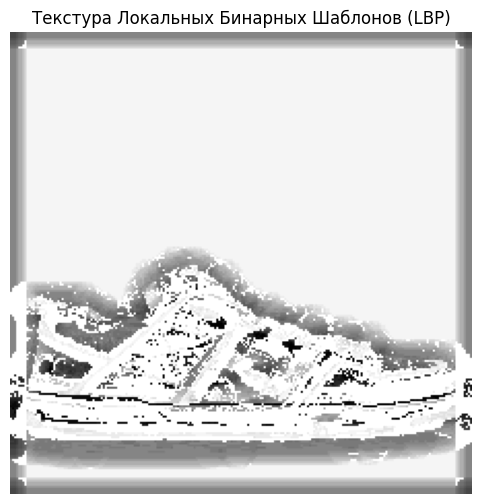

In [76]:
def plot_texture_features(texture):
    # Создать фигуру
    plt.figure(figsize=(6, 6))

    # Отобразить текстуру изображения
    plt.imshow(texture, cmap='gray')  # Использовать карту цветов в оттенках серого

    # Установить заголовок для графика и убрать оси для наглядности
    plt.title('Текстура Локальных Бинарных Шаблонов (LBP)')
    plt.axis('off')

    # Отобразить график
    plt.show()

plot_texture_features(texture)

- https://habr.com/ru/articles/193658/ - Статья про применение ЛБШ на Хабре

Думаю пригодится при обучении модели тк хорошо выделен контраст границ серым


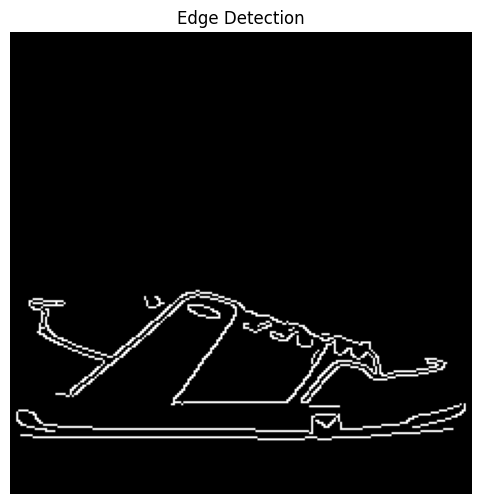

In [78]:
# Показываем как круто мы умеем в палочные рисунки (заплотили края кроссовка)
def plot_edges(edges):
    plt.figure(figsize=(8, 6))
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
    plt.show()

plot_edges(edges)

# Что поделать дальше?

1. Сделать датасет с обработанными записями изображений
2. Можно добавить аугментированные изображеньки:

```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
# Что-то такое
```
Хотя учитывая одинаковость всех фоток не оч ясно ***** а главное зачем
